In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [76]:
train_data = pd.read_csv("D:\code\python\Mini Projects\df_train.csv")
test_data = pd.read_csv("D:\code\python\Mini Projects\df_test.csv")

In [77]:
test_data.describe()

,price,bedrooms,grade,living_in_m2,real_bathrooms,month,quartile_zone
count,6.700000e+03,6700.000000,6700.000000,6700.000000,6700.000000,6700.00000,6700.000000
mean,4.754123e+05,2.240448,2.517612,181.433791,1.665075,6.57194,2.424179
std,2.080475e+05,0.692618,0.971218,68.315420,0.627102,3.09930,1.070753
min,7.500000e+04,1.000000,1.000000,49.238590,1.000000,1.00000,1.000000
25%,3.150000e+05,2.000000,2.000000,129.135170,1.000000,4.00000,2.000000
50%,4.350000e+05,2.000000,2.000000,172.799580,2.000000,6.00000,2.000000
75%,6.021250e+05,3.000000,3.000000,225.754290,2.000000,9.00000,3.000000
max,1.155000e+06,3.000000,5.000000,391.121630,3.000000,12.00000,4.000000


In [78]:
# Convert date strings to datetime objects
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [79]:
# Check for missing values
train_data.isnull().sum()


date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

In [80]:
test_data.isnull().sum()

date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

In [81]:
train_data.duplicated().sum()

2

In [82]:
test_data.duplicated().sum()

1

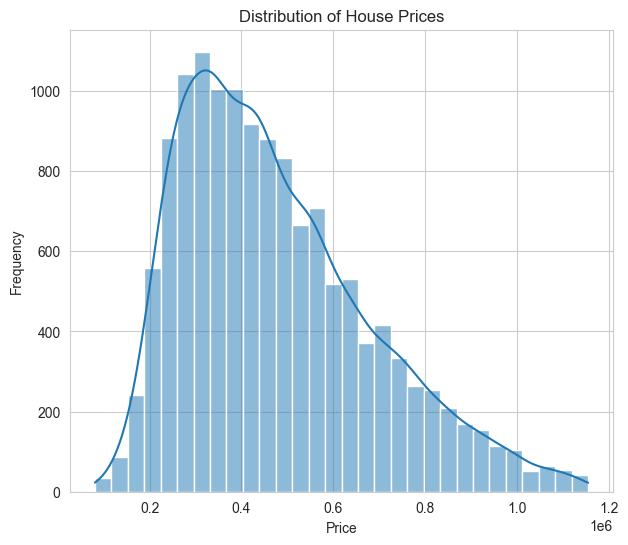

In [83]:
# Plot the distribution of house prices
plt.figure(figsize=(7, 6))
sns.histplot(train_data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [84]:
df = pd.concat([train_data,test_data])
df.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [85]:
# Make numerical columns and categorical columns variables

numerical_cols = df.select_dtypes(include= ['int64', 'float64']).columns 
categorical_cols = df.select_dtypes(exclude= ['int64', 'float64']).drop(columns=['date']).columns

In [86]:
categorical_cols

Index(['has_basement', 'renovated', 'nice_view', 'perfect_condition',
       'has_lavatory', 'single_floor'],
      dtype='object')

In [87]:
numerical_cols

Index(['price', 'bedrooms', 'grade', 'living_in_m2', 'real_bathrooms', 'month',
       'quartile_zone'],
      dtype='object')

In [88]:
# Average Price of the house for number of bedrooms 

bedrooms = df.groupby(['bedrooms'])['price'].mean().reset_index()
bedrooms

,bedrooms,price
0,1,387910.299590
1,2,440593.126589
2,3,551023.829585


In [89]:
# Average Price of the house for grade
grade = df.groupby(['grade'])['price'].mean().reset_index()
grade

,grade,price
0,1,295404.729895
1,2,401385.609500
2,3,526259.726018
3,4,688222.800786
4,5,824374.401961


In [90]:
# Average Price of the house for a nice view
view = df.groupby(['nice_view'])['price'].mean().reset_index()
view

,nice_view,price
0,False,461033.539811
1,True,648027.743557


In [91]:
train_data['total_bathrooms'] = train_data['real_bathrooms'] + train_data['has_lavatory'].astype(int)
test_data['total_bathrooms'] = test_data['real_bathrooms'] + test_data['has_lavatory'].astype(int)

In [92]:
import sklearn
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [93]:
train_data = train_data.drop(columns='date', axis=1)
test_data = test_data.drop(columns='date', axis=1)

In [94]:
labelEncoder = LabelEncoder()

for cat_cols in categorical_cols : 
    train_data[cat_cols] = labelEncoder.fit_transform(train_data[cat_cols])
    test_data[cat_cols] = labelEncoder.fit_transform(test_data[cat_cols])

In [95]:
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1)

In [96]:
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

In [97]:
lr = LinearRegression()
xgb = XGBRegressor()
rf = RandomForestRegressor()

models = [lr,xgb,rf]
names = ["Random Forest", "Linear Regression", "XGBoost"]


In [99]:
index = 0
mse_ = []
r2_ = []
mae_ = []
rmse_ = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(f'{names[index]} validation prediction')
    
    mse = mean_squared_error(pred,y_val)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(pred, y_val)
    r2 = r2_score(pred, y_val)
    
    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    
    index += 1

Random Forest validation prediction
MSE:  10749454222.997496
RMSE:  103679.57476281187
MAE:  77215.63543648698
r2:  0.6850477856297248
--------------------------------------------------
Linear Regression validation prediction
MSE:  11007664580.194672
RMSE:  104917.41790663108
MAE:  75854.27445926708
r2:  0.6970552264977049
--------------------------------------------------
XGBoost validation prediction
MSE:  11543278953.938658
RMSE:  107439.65261456618
MAE:  79073.129638297
r2:  0.6814783063350256
--------------------------------------------------


In [100]:
index = 0
mse_ = []
r2_ = []
mae_ = []
rmse_ = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'{names[index]} test data prediction')
    
    mse = mean_squared_error(pred,y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    
    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    
    index += 1

Random Forest test data prediction
MSE:  11152707877.60266
RMSE:  105606.38180338658
MAE:  78645.25741964683
r2:  0.6535897045481609
--------------------------------------------------
Linear Regression test data prediction
MSE:  10858545271.697718
RMSE:  104204.34382355525
MAE:  75286.49567980411
r2:  0.6839774139201822
--------------------------------------------------
XGBoost test data prediction
MSE:  11720628845.062426
RMSE:  108261.85313887078
MAE:  78173.75769219799
r2:  0.6606382361023004
--------------------------------------------------
